Data on the geographic distribution of COVID-19 cases worldwide

Libraries

In [1]:
# install calmap
! pip install calmap

In [20]:
# essential libraries
import json
import random
from urllib.request import urlopen


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
#import folium

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [51]:
dfCovid = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-17.csv')
dfCovid.head(3)

,Date,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,3/17/2020,17,3,2020,5,0,Afghanistan,AF
1,3/16/2020,16,3,2020,6,0,Afghanistan,AF
2,3/15/2020,15,3,2020,3,0,Afghanistan,AF


Prepocessing :  Cleaning Data

In [76]:
# cases 
cases = ['Cases', 'Deaths', 'Active']

# Active Case = confirmed - deaths - recovered
dfCovid['Active'] = dfCovid['Cases'] - dfCovid['Deaths']

# replacing Antigua_and_Barbuda with just Barbuda
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('Antigua_and_Barbuda', 'Barbuda')

# replacing Central_African_Republic with just CAR
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('Central_African_Republic', 'CAR')

# replacing Democratic_Republic_of_the_Congo with just DRC
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('Democratic_Republic_of_the_Congo', 'DRC')

# replacing United_Republic_of_Tanzania with just BarbTanzania
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('United_Republic_of_Tanzania', 'Tanzania')

# replacing United_States_of_America with just Barbuda
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('United_States_of_America', 'USA')

# replacing Cases_on_an_international_conveyance_Japan with just Japan
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('Cases_on_an_international_conveyance_Japan', 'Japan')

# replacing Saint_Vincent_and_the_Grenadines with just Grenadines
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('Saint_Vincent_and_the_Grenadines', 'Grenadines')

# replacing Bosnia_and_Herzegovina with just Bosnia
dfCovid['Countries and territories'] = dfCovid['Countries and territories'].replace('Bosnia_and_Herzegovina', 'Bosnia')




# filling missing values 
dfCovid[['Countries and territories']] = dfCovid[['Countries and territories']].fillna('')
dfCovid[cases] = dfCovid[cases].fillna(0)

In [80]:
#Group by countries
temp = dfCovid.groupby(['Countries and territories'])['Cases', 'Deaths', 'Active'].sum().reset_index()
temp.style.background_gradient(cmap='Pastel1')

,Countries and territories,Cases,Deaths,Active
0,Afghanistan,21,0,21
1,Albania,51,1,50
2,Algeria,60,4,56
3,Andorra,14,0,14
4,Argentina,65,2,63
5,Armenia,52,0,52
6,Australia,375,5,370
7,Austria,1016,3,1013
8,Azerbaijan,19,0,19
9,Bahamas,1,0,1


In [81]:
#Group by Year and Month
temp = dfCovid.groupby(['Year','Month'])['Cases', 'Deaths', 'Active'].sum().reset_index()
temp.style.background_gradient(cmap='Pastel1')

,Year,Month,Cases,Deaths,Active
0,2019,12,27,0,27
1,2020,1,9799,213,9586
2,2020,2,75377,2708,72669
3,2020,3,94956,4182,90774


In [82]:
#Group by Year
temp = dfCovid.groupby('Year')['Cases', 'Deaths', 'Active'].sum().reset_index()
temp.style.background_gradient(cmap='Pastel1')

,Year,Cases,Deaths,Active
0,2019,27,0,27
1,2020,180132,7103,173029


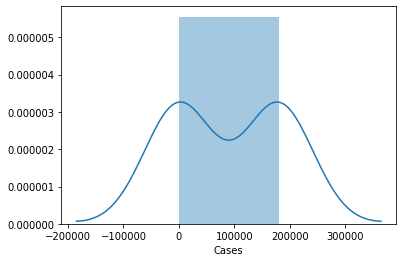

In [8]:
sns.distplot(temp['Cases'])

In [97]:
temp = dfCovid.groupby('Countries and territories')['Cases', 'Deaths', 'Active'].sum().reset_index()
temp.style.background_gradient(cmap='Pastel1')
temp.head(3)

,Countries and territories,Cases,Deaths,Active
0,Afghanistan,21,0,21
1,Albania,51,1,50
2,Algeria,60,4,56


In [84]:
tm = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths'])
fig = px.treemap(tm, path=["variable"], values="value", height=400, width=600)
fig.show()

Country wise Data : In each country

In [85]:
dfCovid2 = dfCovid.drop(['Day','Month', 'Year'],axis='columns')
dfCovid2.head(3)

,Date,Cases,Deaths,Countries and territories,GeoId,Active
0,3/17/2020,5,0,Afghanistan,AF,5
1,3/16/2020,6,0,Afghanistan,AF,6
2,3/15/2020,3,0,Afghanistan,AF,3


Countries with deaths reported

In [86]:
df_country = pd.read_csv('Country.csv', encoding='latin1')
df_country.head(5)

,GeoId,latitude,longitude,country_name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [87]:
#result = df_country.join(dfCovid2, how='inner')
result = pd.merge(df_country, dfCovid2, on='GeoId');
result.head()

,GeoId,latitude,longitude,country_name,Date,Cases,Deaths,Countries and territories,Active
0,AD,42.546245,1.601554,Andorra,3/17/2020,9,0,Andorra,9
1,AD,42.546245,1.601554,Andorra,3/16/2020,3,0,Andorra,3
2,AD,42.546245,1.601554,Andorra,3/14/2020,1,0,Andorra,1
3,AD,42.546245,1.601554,Andorra,3/3/2020,1,0,Andorra,1
4,AE,23.424076,53.847818,United Arab Emirates,3/17/2020,12,0,United_Arab_Emirates,12


In [99]:
country = result.groupby(['Countries and territories', 'latitude', 'longitude'])['Cases', 'Deaths', 'Active'].sum().reset_index()
country.style.background_gradient(cmap='Pastel1')
country.head()

,Countries and territories,latitude,longitude,Cases,Deaths,Active
0,Afghanistan,33.939110,67.709953,21,0,21
1,Albania,41.153332,20.168331,51,1,50
2,Algeria,28.033886,1.659626,60,4,56
3,Andorra,42.546245,1.601554,14,0,14
4,Argentina,-38.416097,-63.616672,65,2,63


In [96]:
country = result
country.head(5)

,GeoId,latitude,longitude,country_name,Date,Cases,Deaths,Countries and territories,Active
0,AD,42.546245,1.601554,Andorra,3/17/2020,9,0,Andorra,9
1,AD,42.546245,1.601554,Andorra,3/16/2020,3,0,Andorra,3
2,AD,42.546245,1.601554,Andorra,3/14/2020,1,0,Andorra,1
3,AD,42.546245,1.601554,Andorra,3/3/2020,1,0,Andorra,1
4,AE,23.424076,53.847818,United Arab Emirates,3/17/2020,12,0,United_Arab_Emirates,12


In [58]:
# World wide
#import folium
#from folium.plugins import HeatMap

#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import webbrowser




m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(country)):
    folium.Circle(
        location=[country.iloc[i]['latitude'], country.iloc[i]['longitude']],
        color='crimson',
        tooltip =   '<li><bold>Countries and territories : '+str(country.iloc[i]['Countries and territories'])+
                    '<li><bold>Cases : '+str(country.iloc[i]['Cases'])+
                    '<li><bold>Deaths : '+str(country.iloc[i]['Deaths']),
            radius=int(country.iloc[i]['Cases'])**1.1).add_to(m)
m

Countries with Confirmed Cases

In [89]:
# Confirmed

fig = px.choropleth(country, locations="Countries and territories", 
                    locationmode='country names', color="Cases", 
                    hover_name="Countries and territories", range_color=[1,7000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

Countries with Deaths Reported

In [90]:
# Deaths

fig = px.choropleth(country[country['Deaths']>0], 
                    locations="Countries and territories", locationmode='country names',
                    color="Deaths", hover_name="Countries and territories", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

Spread over time

In [95]:

formated_gdf = country.groupby(['Date', 'Countries and territories'])['Cases', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Cases'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Countries and territories", locationmode='country names', 
                     color="Cases", size='size', hover_name="Countries and territories", 
                     range_color= [0, max(formated_gdf['Cases'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

